In [17]:
# https://www.kaggle.com/niyipop/2-layer-neural-network-from-scratch-using-numpy
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split

%matplotlib inline



In [18]:
#Convert array to one-hot encoding
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

#Convert one-hot encoding to array
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

#sigmoid and its derivative
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

#Normalize array
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)



# Iris Dataset

In [19]:
#read data from csv
iris = pd.read_csv("./Iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [20]:
#Data cleanup
#Replace the species with 1,2 or 3 as appropriate
iris['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

#Get input
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris, columns=columns)
x = normalize(x.as_matrix())

#Get Output, flatten and encode to one-hot
columns = ['Species']
y = pd.DataFrame(iris, columns=columns)
y = y.as_matrix()
y = y.flatten()
y = to_one_hot(y)

AttributeError: 'DataFrame' object has no attribute 'as_matrix'

In [15]:
#Split data to training and validation data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

NameError: name 'y' is not defined

In [16]:
X_train.shape

NameError: name 'X_train' is not defined

In [86]:
y_train.shape

(100, 3)

# Creating Artificial Dasaset

In [172]:
from sklearn import datasets
#X, y = datasets.make_blobs(n_samples=5000, n_features=20, cluster_std=5.0, centers=2, random_state=42)
X, y = datasets.make_moons(n_samples=5000, shuffle=True, noise=1, random_state=None)

In [173]:
X.shape

(5000, 2)

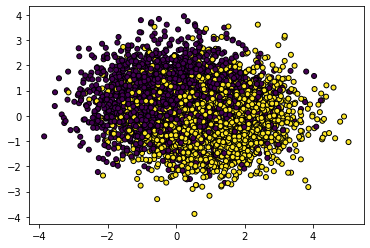

In [174]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

In [175]:
#Split data to training and validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [176]:
X_train.shape

(3350, 2)

In [177]:
y_train.shape

(3350,)

In [178]:
y_train = to_one_hot(y_train)
y_test = to_one_hot(y_test)
y_train

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [179]:
input_dims = 2
hidden_dims = 5
output_dims = 2
#Initialization Weights
w0 = 2*np.random.random((input_dims, hidden_dims)) - 1 #for input   - 4 inputs, 3 outputs
w1 = 2*np.random.random((hidden_dims, output_dims)) - 1 #for layer 1 - 5 inputs, 3 outputs


In [180]:
#learning rate
learning_rate = 0.1

#Errors - for graph later
errors = []

#Train
for i in range(10):

    #Feed forward
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    #Back propagation using gradient descent
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += learning_rate * layer1.T.dot(layer2_delta)
    w0 += learning_rate * layer0.T.dot(layer1_delta)
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100
    
    print('Error: {:.10f} Acc: {}'.format(error, accuracy))


Error: 0.5357018123 Acc: 46.429818768324104
Error: 0.5221153563 Acc: 47.78846437387367
Error: 0.4980294025 Acc: 50.19705974576605
Error: 0.5144647224 Acc: 48.55352776205526
Error: 0.3794625385 Acc: 62.05374615370361
Error: 0.4093664344 Acc: 59.06335655912067
Error: 0.3654358921 Acc: 63.45641079480355
Error: 0.4250485116 Acc: 57.49514883908922
Error: 0.3779807512 Acc: 62.201924879472294
Error: 0.4471133915 Acc: 55.288660851911196


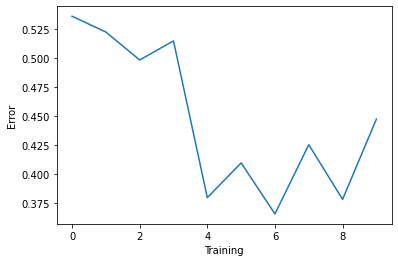

Training Accuracy 55.29%


In [181]:

#Plot the accuracy chart
plt.plot(errors)
plt.xlabel('Training')
plt.ylabel('Error')
plt.show()
        
print("Training Accuracy " + str(round(accuracy,2)) + "%")

In [160]:
#Validate
layer0 = X_test
layer1 = sigmoid(np.dot(layer0, w0))
layer2 = sigmoid(np.dot(layer1, w1))

layer2_error = y_test - layer2

error = np.mean(np.abs(layer2_error))
accuracy = (1 - error) * 100

print("Validation Accuracy " + str(round(accuracy,2)) + "%")



Validation Accuracy 100.0%


# Four Layers Neural Network

In [182]:
# https://medium.com/@chamakhabdallah8/coding-four-layer-neural-network-9e5cbaf95d5b
import numpy as np

learning_rate = 0.01
nb_inp = 2
nb_h1 = 150
nb_h2 = 150
nb_out = 1

In [183]:
np.random.seed(1)
w1 = np.random.normal(scale=0.1,size=(nb_inp,nb_h1))
w2 = np.random.normal(scale=0.1,size=(nb_h1,nb_h2))
w3 = np.random.normal(scale=0.1,size=(nb_h2,nb_out))
b1 = np.zeros(nb_h1)
b2 = np.zeros(nb_h2)
b3 = np.zeros(nb_out)

In [184]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [185]:
def sigmoid_prime(x):
    return x*(1-x)

In [186]:
def train(x,y,w1,w2,w3,b1,b2,b3) :

    # feed forward
    inp_l = x
    l1 = sigmoid(np.dot(inp_l,w1) + b1)
    l2 = sigmoid(np.dot(l1,w2) + b2)
    l3 = sigmoid(np.dot(l2,w3) + b3)

    #backpropagation
    delta_l3 = (y - l3)*sigmoid_prime(l3)          
    delta_l2 = delta_l3.dot(w3.T)*sigmoid_prime(l2) 
    delta_l1 = delta_l2.dot(w2.T)*sigmoid_prime(l1) 

  
    #update weights
    w3 += (np.dot(l2.T,delta_l3))
    w2 += (np.dot(l1.T,delta_l2))
    w1 += (np.dot(inp_l.T,delta_l1))

    #  update biases
    b3 = b3 + (np.sum(delta_l3,axis=0))
    b2 = b2 + (np.sum(delta_l2,axis=0))
    b1 = b1 + (np.sum(delta_l1,axis=0))
    #print(b1.shape)

    return w1,w2,w3,b1,b2,b3

In [188]:
x = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1],])
y = np.array([[1],
              [0],
              [0],
              [1]])

In [189]:
params = w1,w2,w3,b1,b2,b3

for i in range(0,10) :
    params = train(x,y,*params)

In [190]:
def predict(x,w1,w2,w3,b1,b2,b3) :
    l1 = sigmoid(np.dot(x,w1) + b1)
    l2 = sigmoid(np.dot(l1,w2) + b2)
    l3 = sigmoid(np.dot(l2,w3) + b3)
    print(l3.round(decimals=2))
    
test = x[0]
predict(test,*params)

[1.]
